In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.optimize import curve_fit #used to find the fit parameters

### This program is designed to show how changing different parameters of a series of coupled harmonic osciallators (modelled as connected masses) changes the fundamental frequency of the oscillator as a whole.

To begin, we will create function that will allow us to know the eigenvalues of the system, from which we can learn the fundamental frequency of the system.

In [2]:
def geteigen():
    """Calculate eigenvalues and eigenvectors for N coupled oscillators
    
    Keyword arguments: None
    
    Global variables: N, k
    
    Returns: frequences, array of eigenvectors
    """
    
    #Build matrices
    A=np.zeros((N,N))

    for i in range(N):
        A[i,i] = 2*k
        if i==0:
            A[0,i+1]=-k
        elif i==N-1:
            A[i,i-1]=-k
        else:
            A[i,i-1]=-k
            A[i,i+1]=-k

    B=m*np.identity(N)

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B) # eigenvalues and eigenvectors
    omegas = np.sqrt(lamb) #frequencies
    
    return omegas, a

In [3]:
#standard initial global variables

#properties of the system
M = 1.0 #mass of string in kg
L = 10.0 #length of string in m
K = 1.0 #effective stiffness in N/m
N = 10 #number of masses

#properties of each mass
m = M/N
L0 = L/(N+1)
k = K*(N+1)

After defining our standard global variables, we can move on to adjusting one parameter at a time to see how it affects the fundamental frequency as it changes. To start off, we will be adjusting the total mass of the system, while leaving number of masses and spring stiffness constant.

### $\Delta$Mass

popt =  [2.98522123]
pcov =  [3.98454008e-31]


<ipython-input-4-983188d54d64>:34: RuntimeWarning: divide by zero encountered in true_divide
  model = lambda x,A: A/np.sqrt(x)


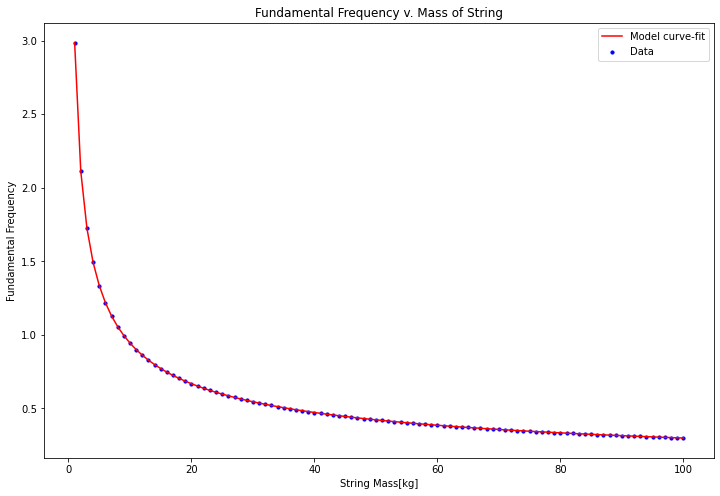

In [4]:
#Looping through M, 1-100 kg

#properties of the system
M = 1.0 #mass of string in kg
L = 10.0 #length of string in m
K = 1.0 #effective stiffness in N/m
N = 10 #number of masses

#properties of each mass
m = M/N
L0 = L/(N+1)
k = K*(N+1)

omega_m = []
Masses = []

for i in range(0, 100):
    
    Mass = i+1.0
    m = Mass/N
    
    omegas, a = geteigen()
    #print(Mass, omegas[0])
    omega_m.append(omegas[0])
    Masses.append(Mass)
    

xdata = Masses
ydata = omega_m

ydata = np.array(ydata)
    
#model = lambda x,A,T: A*np.exp(-x/T)
model = lambda x,A: A/np.sqrt(x)
guess=[1] # this is the initial guess for the fit parameters; you need a 1 for each parameter
params, covariance = curve_fit(model, xdata, ydata, p0=guess)
print("popt = ",params)
print("pcov = ",covariance[0])

xmodel = np.linspace(0,100,1000)
ymodel = model(xmodel,*params)
    
    


fig = plt.figure(figsize = (12,8))
#frame1=fig.add_axes((.1,.3,.8,.6))

plt.title("Fundamental Frequency v. Mass of String")
plt.xlabel("String Mass[kg]")
plt.ylabel("Fundamental Frequency")
plt.plot(xdata, ydata, color = "red", label = "Model curve-fit")
plt.scatter(Masses, omega_m, s = 10,color = "blue", label = "Data")
plt.legend()
# frame1.set_xticklabels([]) # remove x-tic labels for the first frame

# residuals = model(xdata,params[0],params[1]) - ydata #calculate residuals

# frame2=fig.add_axes((.1,.1,.8,.2))        
# plt.plot(xdata,residuals,'or')
# plt.ylabel("Residual")
# plt.xlabel("K[N]")
# plt.grid()

# plt.show()

# #results
# print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
# print("The curve fit parameters are: ({:.2f})".format(params[0],))

As we can see in the graph above, the fundamental frequency of the oscillator decays by an inverse square factor as it gains mass.
This lines up with my expectations, as frequency ($ \omega = \sqrt{\frac{k}{m}}$) decreases as mass increases.

Now, let's investigate how keeping mass and spring stiffness constant, but changing the *number* of masses that make up the oscillator changes fundamental frequency.

### $\Delta$N

popt =  0.0006785456116075173
pcov =  [ 6.18997478e-09 -6.25187458e-07]


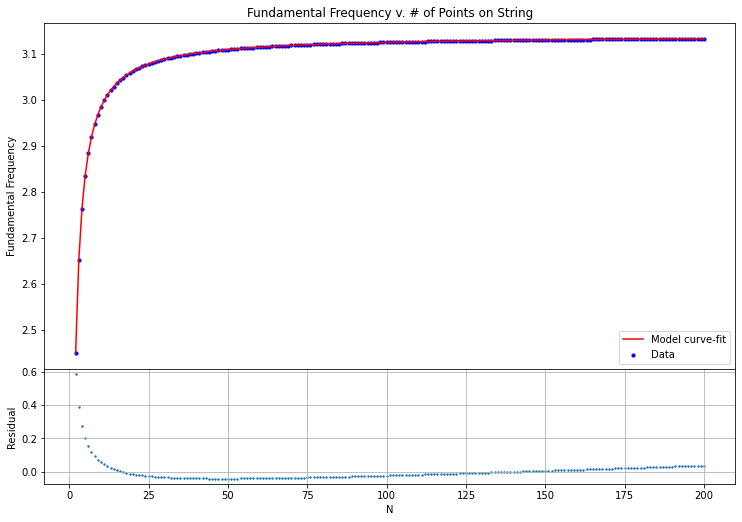

The sum of the squares of the residuals = 8.007964e-01
The curve fit parameters are: (0.00) (3.04)


In [5]:
#Looping through N, 1-100 

#properties of the system
M = 1.0 #mass of string in kg
L = 10.0 #length of string in m
K = 1.0 #effective stiffness in N/m
N = 10 #number of masses

#properties of each mass
m = M/N
L0 = L/(N+1)
k = K*(N+1)

omega_n = []
Num = []

for i in range(1, 200):
    
    n = i+1
    m = M/n
    k = K*(n+1)
    N = n
    omegas, a = geteigen()
    #print(Mass, omegas[0])
    omega_n.append(omegas[0])
    Num.append(n)
    

xdata = Num
ydata = omega_n
xdata = np.array(xdata)
ydata = np.array(ydata)
    
model = lambda x,A,B: A*x + B
guess=[1, 0] # this is the initial guess for the fit parameters; you need a 1 for each parameter
params, covariance = curve_fit(model, xdata, ydata, p0=guess)
print("popt = ",params[0])
print("pcov = ",covariance[0])

xmodel = np.linspace(0,200,1000)
ymodel = model(xmodel,*params)
    
    
fig = plt.figure(figsize = (12,8))
frame1=fig.add_axes((.1,.3,.8,.6))

plt.title("Fundamental Frequency v. # of Points on String")
plt.xlabel("Number of Points on String")
plt.ylabel("Fundamental Frequency")
plt.plot(xdata, ydata, color = "red", label = "Model curve-fit")
plt.scatter(Num, omega_n, s = 10,color = "blue", label = "Data")
plt.legend()
frame1.set_xticklabels([]) # remove x-tic labels for the first frame

residuals = model(xdata,params[0],params[1]) - ydata #calculate residuals

frame2=fig.add_axes((.1,.1,.8,.2))        
plt.scatter(xdata,residuals,s = 2)
plt.ylabel("Residual")
plt.xlabel("N")
plt.grid()

plt.show()

#results
print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
print("The curve fit parameters are: ({:.2f}) ({:.2f})".format(params[0],params[1]))

Fundamental frequency increases in a *mostly linear* manner along with number of masses, however the residuals seem to point to a modified parabolic shape. This defied my expectations of exactly *how* frequency increases, but makes some sense.

Now, we turn our focus to the spring stiffness of the *entire* oscillator, and how it affects the fundamental frequency.

### $\Delta K$

popt =  2.985221232138515
pcov =  [3.98679479e-31]


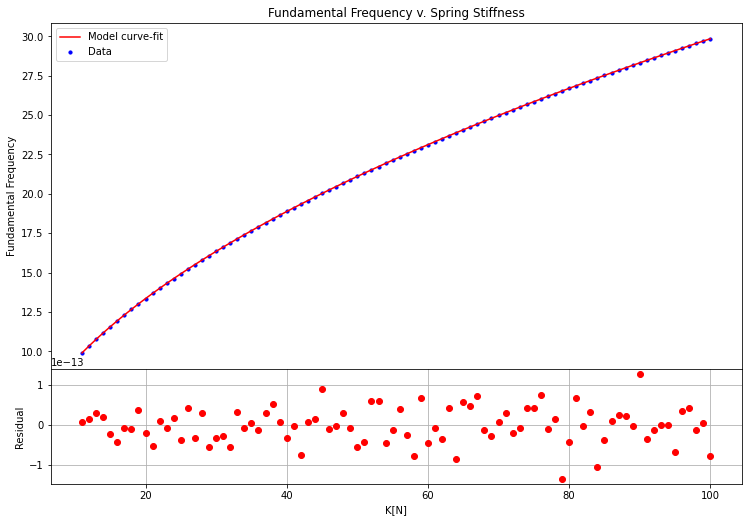

The sum of the squares of the residuals = 1.772350e-25
The curve fit parameters are: (2.99)


In [35]:
#Looping through K, 1-50 N

#properties of the system
M = 1.0 #mass of string in kg
L = 10.0 #length of string in m
K = 1.0 #effective stiffness in N/m
N = 10 #number of masses

#properties of each mass
m = M/N
L0 = L/(N+1)
k = K*(N+1)

omega_k = []
Ks = []

for i in range(10, 100):
    
    K = i+1.0
    k = K*(N+1)
    omegas, a = geteigen()
    #print(Mass, omegas[0])
    omega_k.append(omegas[0])
    Ks.append(K)
    

xdata = Ks
ydata = omega_k
    
model = lambda x,A: A*np.sqrt(x)
guess=[15] # this is the initial guess for the fit parameters; you need a 1 for each parameter
params, covariance = curve_fit(model, xdata, ydata, p0=guess)
print("popt = ",params[0])
print("pcov = ",covariance[0])

xmodel = np.linspace(0,50,1000)
ymodel = model(xmodel,*params)
    
    
fig = plt.figure(figsize = (12,8))
frame1=fig.add_axes((.1,.3,.8,.6))

plt.title("Fundamental Frequency v. Spring Stiffness")
plt.xlabel("Spring Stiffness [N]")
plt.ylabel("Fundamental Frequency")
plt.plot(xdata, ydata, color = "red", label = "Model curve-fit")
plt.scatter(Ks, omega_k, s = 10,color = "blue", label = "Data")
plt.legend()
frame1.set_xticklabels([]) # remove x-tic labels for the first frame

residuals = model(xdata,params[0]) - ydata #calculate residuals

frame2=fig.add_axes((.1,.1,.8,.2))        
plt.plot(xdata,residuals,'or')
plt.ylabel("Residual")
plt.xlabel("K[N]")
plt.grid()

plt.show()

#results
print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
print("The curve fit parameters are: ({:.2f})".format(params[0],))

Fundamental frequency increases in a roughly square-root fashion. This is likely due to the fundamental frequency of each individual connection increasing due to a larger spring stiffness between the two, contributing to a higher overall fundamental frequency.